In [1]:
import pandas as pd
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
df=pd.read_csv("filename.csv")

In [3]:
boş_satırlar = df['reply_to'].isnull()
df = df[~boş_satırlar]
boş_satırlar = df['reply_to'].apply(lambda x: x == "[]")
df = df[~boş_satırlar]

In [4]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN
5,1630366214353739777,1630008853931720706,2023-02-28 00:36:10 UTC,2023-02-28,00:36:10,0,1594718863437930496,douglas08261722,Douglas newman,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CJKlein1', 'name': 'CJK', 'i...",NaN,NaN,NaN,NaN
7,1630366210532552706,1629933112971935745,2023-02-28 00:36:09 UTC,2023-02-28,00:36:09,0,244366930,cb1971mission,Carlos Belmares,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kathykrobot', 'name': 'Kathl...",NaN,NaN,NaN,NaN


In [5]:
df["reply_to"]= df["reply_to"].str.lower() #kucuk harfe donusturduk
df["reply_to"]= df["reply_to"].str.replace('[^\w\s]','')#noktalama işaretlerini kaldır
df["reply_to"]= df["reply_to"].str.replace('\n','') # slash n leri bul kaldır boşlukları bul kaldır
df["reply_to"]= df["reply_to"].str.replace('\d+','') #rakamları bul kaldır
df["reply_to"]= df["reply_to"].str.replace('\r','') #satırbaslarını kaldır

In [6]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=mask)
    wc.generate(" ".join(data)) # join diyerek bütün sütunlardaki satırları birleştiriyor
    plt.imshow(wc)
    plt.axis("off")

In [21]:
" ".join(df["reply_to"])

'screen_name nazijaeger__ name nazijaeger id  screen_name derwener name werner feiler id  screen_name anonymous name anonymous germany id  screen_name mainelifer name mainelife id  screen_name baddcompani name badd company id  screen_name pottingpinks name grs id  screen_name mfa_russia name mfa russia  id  screen_name mod_russia name минобороны россии id  screen_name mil_hist_rf name военная история id  screen_name muzeypobedy name музей победы id  screen_name rvio_ru name российское военноисторическое общество id  screen_name rushistorg name российское историческое общество id  screen_name wwfacts name world war ii history id  screen_name cjklein name cjk id  screen_name genflynn name ltg r mike flynn id  screen_name kathykrobot name kathleen id  screen_name ronfilipkowski name ron filipkowski  id  screen_name edwardbrink name anno domini id  screen_name sentdefender name osintdefender id  screen_name taviduprix name richard blanton id  screen_name tigerlily name tigerlily id  screen

In [45]:
spam=df[df["reply_to"]==1]

In [46]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [47]:
from wordcloud import WordCloud, STOPWORDS

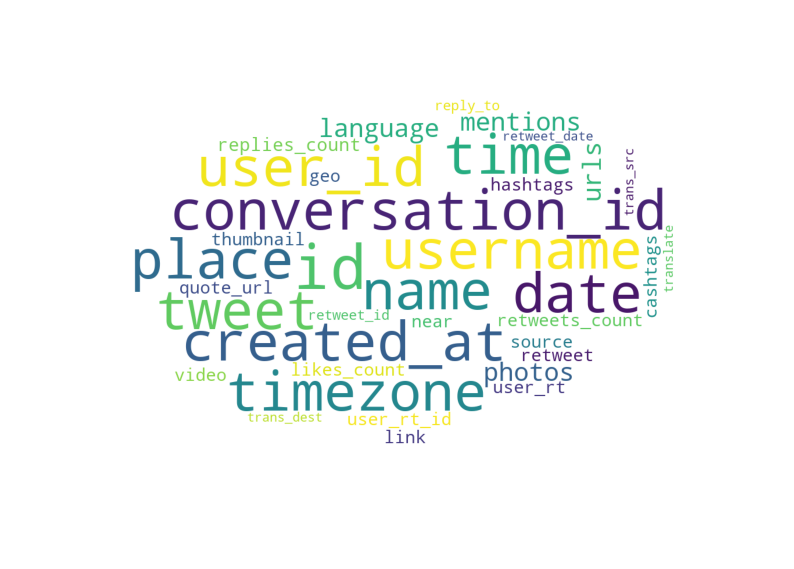

In [48]:
wc(spam,"white")

In [49]:
from textblob import TextBlob

In [50]:
# Duygu analizini gerçekleştirme
def duygu_analizi(metin):
    if metin is not None:  # Boş değeri kontrol etme
        metin = str(metin)  # Veriyi stringe dönüştürme
        analiz = TextBlob(metin)
        if analiz.sentiment.polarity > 0:
            return "Pozitif"
        elif analiz.sentiment.polarity < 0:
            return "Negatif"
        else:
            return "Nötr"
    else:
        return None  # Boş değerler için None döndürme

# Metinlerdeki boş değerleri temizleme ve duygu analiz sonuçlarını yeni bir kolona yazma
df['duygu_analizi'] = df['reply_to'].fillna("").apply(duygu_analizi)
df.drop(columns=['reply_to'], inplace=True)

In [51]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest,duygu_analizi
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nötr
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nötr
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nötr
5,1630366214353739777,1630008853931720706,2023-02-28 00:36:10 UTC,2023-02-28,00:36:10,0,1594718863437930496,douglas08261722,Douglas newman,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nötr
7,1630366210532552706,1629933112971935745,2023-02-28 00:36:09 UTC,2023-02-28,00:36:09,0,244366930,cb1971mission,Carlos Belmares,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nötr


In [52]:
for column in df.columns:
    if column != 'reply_to': 
        value_counts = df[column].value_counts()
        num_categories = len(value_counts)
        
        # İki alt kategorisi varsa 0 ve 1 olarak kodlayalım
        if num_categories == 2:
            category_mapping = {category: index for index, category in enumerate(value_counts.index)}
            df[column] = df[column].map(category_mapping)
        # İki alt kategoriden fazlaysa 1'den başlayan sıralı sayılarla kodlayalım
        else:
            category_mapping = {category: index + 1 for index, category in enumerate(value_counts.index)}
            df[column] = df[column].map(category_mapping)

In [53]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest,duygu_analizi
0,1,1943,4662,1,4662,1,1121,1121,1143,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,856,2716,723,1,723,1,4552,4552,4468,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4567,867,723,1,723,1,670,670,401,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,4566,853,2585,1,2585,1,3694,3694,3647,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,4565,180,2584,1,2584,1,3693,3693,3646,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
